In [1]:
import numpy as np

In [2]:
# extract data

data_string = """
1,8.2
2,10.1
3,13.5
4,16.0
5,19.4
6,22.1
7,25.6
8,28.2
9,31.0
10,35.1
11,37.4
12,40.6
13,44.2
14,47.1
15,49.8
16,53.6
17,56.2
18,59.9
19,62.1
20,65.7
21,68.4
22,71.6
23,74.2
24,77.9
25,80.1
26,83.8
27,86.5
28,89.1
29,92.7
30,95.4
31,98.9
32,101.6
33,104.2
34,107.9
35,110.1
36,113.8
37,116.5
38,119.1
39,122.7
40,125.4
41,128.6
42,131.2
43,134.9
44,137.1
45,140.8
46,143.5
47,146.1
48,149.7
49,152.4
50,155.6
51,158.2
52,161.9
53,164.1
54,167.8
55,170.5
56,173.1
57,176.7
58,179.4
59,182.6
60,185.2
61,188.9
62,191.1
63,194.8
64,197.5
65,200.1
66,203.7
67,206.4
68,209.6
69,212.2
70,215.9
71,218.1
72,221.8
73,224.5
74,227.1
75,230.7
76,233.4
77,236.6
78,239.2
79,242.9
80,245.1
81,248.8
82,251.5
83,254.1
84,257.7
85,260.4
86,263.6
87,266.2
88,269.9
89,272.1
90,275.8
91,278.5
92,281.1
93,284.7
94,287.4
95,290.6
96,293.2
97,296.9
98,299.1
99,302.8
100,305.5
"""
data = data_string.split()
x, y = list(), list()
for inx in data:
    a, b = inx.split(',')
    x.append(a)
    y.append(b)

In [3]:
# Create array

x  = np.array(x, dtype=float)
Xd = np.column_stack([np.ones((len(x), 1)), x])
y  = np.array(y, dtype=float)

In [4]:
# scale
X_mean    = Xd[:, 1:].mean(axis=0)
X_std     = Xd[:, 1:].std(axis=0)
Xd[:, 1:] = (Xd[:, 1:] - X_mean) / X_std

y_mean = y.mean()
y_std  = y.std()
yd     = (y - y_mean) / y_std

In [5]:
# msk split
np.random.seed(42)
val_size = 0.8
msk = np.random.rand(len(Xd)) < val_size

In [6]:
# split train and validation

X_train, X_val = Xd[msk], Xd[~msk]
y_train, y_val = y[msk], y[~msk]

In [7]:
# m_samples n_feature

m_train, n_train = X_train.shape

In [8]:
# hyper parameter

lr  = 0.01
eps = 1000

In [9]:
# theta
theta = np.zeros(n_train)

In [10]:
#lss hist train

lss_hist = list()

In [11]:
# model
for i in range(eps):
    yp = X_train.dot(theta)

    err = yp - y_train
    lss = np.mean(err ** 2)
    lss_hist.append(lss)

    grad = 2 / m_train * X_train.T.dot(err)
    theta -= lr * grad

In [12]:
# lss val, lss_train

err_train = X_train.dot(theta) - y_train
lss_train = np.mean(err_train ** 2)

err_val = X_val.dot(theta) - y_val
lss_val = np.mean(err_val ** 2)

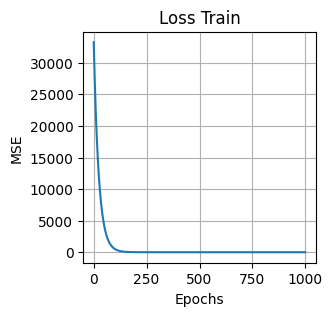

In [13]:
# load library
import matplotlib.pyplot as plt

#plot lss train

plt.figure(figsize=(3, 3))
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Loss Train')
plt.grid(True)
plt.plot(lss_hist)
plt.show()

In [14]:
print(f'lss val: {lss_val}', f'lss train: {lss_train}')

lss val: 0.21890090032861442 lss train: 0.15300492234566673
